**ADD STARTING INFORMATION HERE**
<br>Students will have already completed the satellite imagery workshop, and seen the healthy plant demos.

In [2]:
# import all necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create some useful functions to use during this workshop
def convert(image):
    '''
    this function converts NDVI images (e.g. from Sentinal Hub) into a luminosity array, ready to use for the rest of the workshop
    '''
    
    # open the original image, and show its filetype, colour mode and size
    original = Image.open(image)
    print("original:", original.format, original.mode, original.size)
    # the filetype should be JPEG or PNG; the colour mode should be RGB
    
    # convert into a numpy array containing all the pixels except the top 25 rows to cut off the header, and show its data type and shape
    np_img = np.asarray(original)
    np_img = np.delete(np_img, slice(0, 25), axis=0)
    print("array: ", np_img.dtype, np_img.shape)
    # the data type should be uint8, the size should be 25 pixels smaller than the original in one dimension
    
    # convert into a luminosity plot by taking just the green values [1] and return as the function's output
    # the colour is determined by the brightness/depth of the pixel, ignoring whether it is red, green or blue
    # Note: this works for our images in NDVI format as they have been pre-processed in this way, you might get strange results using other images!
    lum_img = np_img[:, :, 1]
    return lum_img

def tidy_plot():
    '''
    this function removes the axes of the plots
    because they only show the size of the image, they can be misleading and are not needed for this workshop
    '''
    plt.xticks([])
    plt.yticks([])

**Add some information about your chosen image, so that people understand what it means.<br>
Labels, add a title etc.**

original: JPEG RGB (1536, 703)
array:  uint8 (678, 1536, 3)


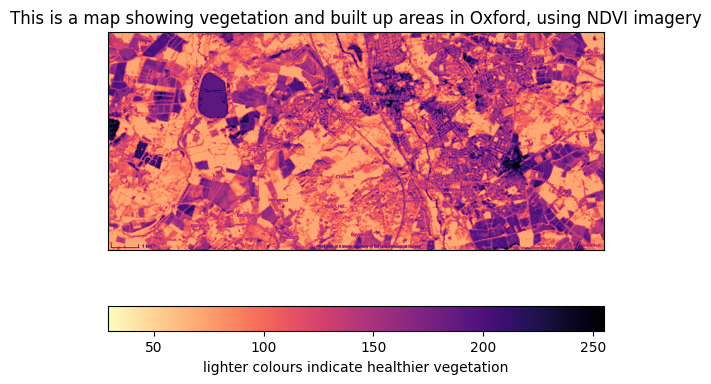

In [5]:
my_Image = convert( "Landsat_NDVI.jpg" ) # EDIT THIS FOR YOUR NEW IMAGE OR PIC YOUR FAVOURITE ONE OF OURS
plt.imshow(my_Image, cmap='magma_r') # CHANGE TO YOUR FAVOURITE COLOUR MAP
tidy_plot()
plt.title('This is a map showing vegetation and built up areas in Oxford, using NDVI imagery')
plt.colorbar(orientation='horizontal', label='lighter colours indicate healthier vegetation')

Plot a histagram of the image, to see which colours are the most prominant.

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 6.0000e+00, 7.0000e+00,
        5.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+01, 1.4000e+01,
        1.7000e+01, 1.3000e+01, 1.2000e+01, 7.9000e+01, 3.5000e+01,
        3.8000e+01, 2.7000e+01, 2.0000e+01, 1.6000e+01, 2.3000e+01,
        2.5000e+01, 4.0000e+01, 7.3000e+01, 1.1400e+02, 1.5600e+02,
        4.7500e+02, 1.9500e+02, 2.2400e+02, 2.5600e+02, 3.8700e+02,
        3.6100e+02, 4.4200e+02, 5.9900e+02, 9.8600e+02, 1.6130e+03,
        3.0410e+03, 5.9500e+03, 1.1458e+04, 1.9811e+04, 4.0855e+04,
        6.6841e+04, 2.6060e+04, 1.6166e+04, 9.88

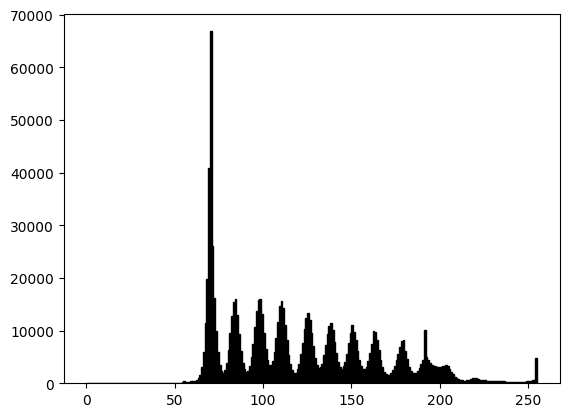

In [6]:
plt.hist(my_Image.ravel(), bins=range(256), fc='k', ec='k')

You can see that most of the data is concentrated at the beginning of the scale.<br>
Low numbers are the darkest parts, the part that shows the most organic matter / healthiest vegetation.<br>
<br>
You could, for example, plot a graph of just the first part of this histogram, to focus in on the healthy vegetation and ignoring the rest.

Text(0.5, 1.0, 'NDVI map of Oxford')

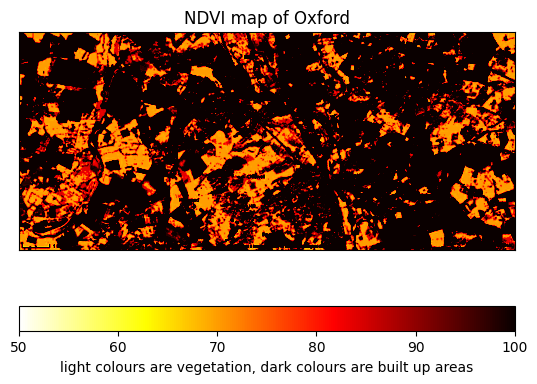

In [12]:
plt.imshow(my_Image, clim=(50, 100), cmap='hot_r')
tidy_plot()
plt.colorbar(orientation='horizontal', label='light colours are vegetation, dark colours are built up areas')
plt.title('NDVI map of Oxford')

Or the opposite, to highlight the built-up areas and merge all of the 'mostly healthy' vegetation together.

Text(0.5, 1.0, 'NDVI map of Oxford')

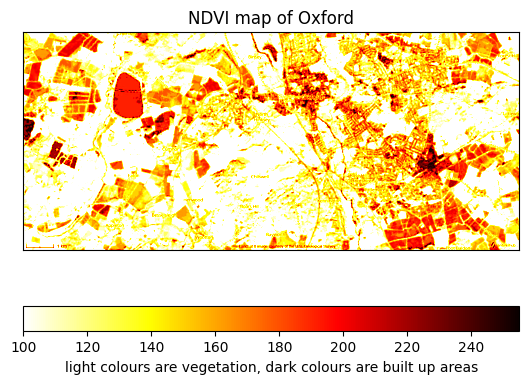

In [10]:
plt.imshow(my_Image, clim=(100, 255), cmap='hot_r')
plt.colorbar(orientation='horizontal', label='light colours are vegetation, dark colours are built up areas')
tidy_plot()
plt.title('NDVI map of Oxford')

Compare the two images above - they both have the same description on the colour bar, but look very different!<br>
Why might you want do this with images?<br>
Do you think it would be a problem if someone did this to an image and didn't tell you what they had done?